In [6]:
# YOU MUST USE 3.6.0 AND ABOVE FOR RUNNING GLMNET
#install.packages("psycho")
#install.packages("zoo")
#install.packages("scales")
#install.packages("rlang")
#install.packages("tidyverse")
#install.packages('lm.beta')
#install.packages("standardize")
library(data.table)
library("rvest")

library("zoo")
library("dplyr")

library(tidyverse)
library(caret)
library("lm.beta")
library("psycho")

library("standardize")
library("glmnet")
rm(list=ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2206548,117.9,3651142,195,3651142,195.0
Vcells,3672343,28.1,8388608,64,5926322,45.3


In [7]:
start_time <- Sys.time()
new_data=fread("num_slim_data_4.csv")

end_time <- Sys.time()

end_time - start_time
dim(new_data)

Time difference of 11.96477 secs

[1] 478174    215

[1] 215

[1] 478174    215

Warning message in summary.lm(model[[i]]):
“essentially perfect fit: summary may be unreliable”

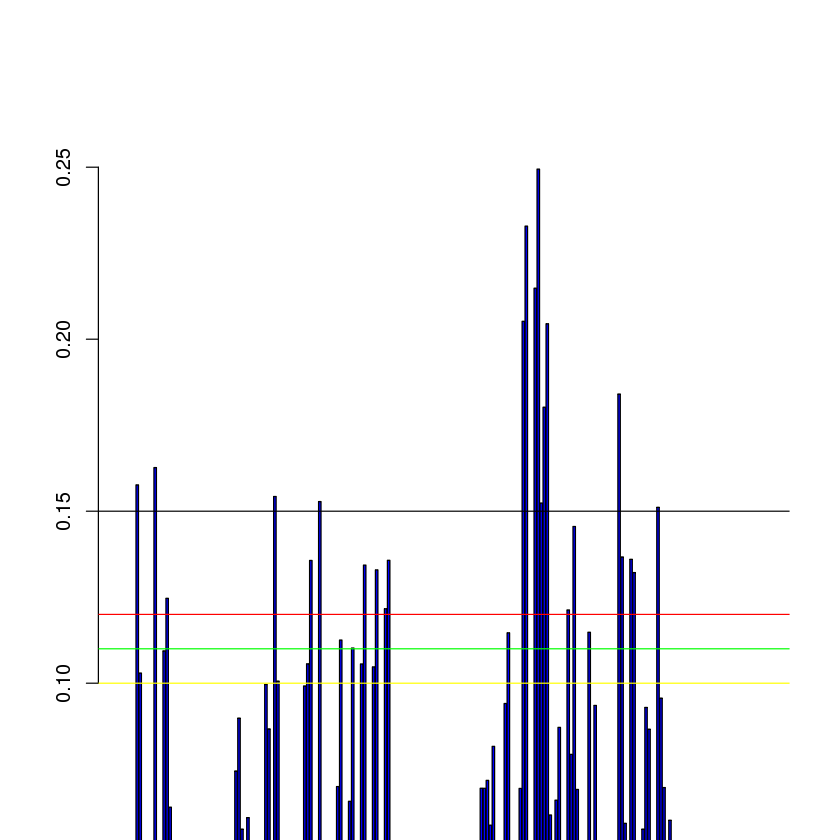

In [8]:
grep("count",colnames(new_data))
scale=as.data.frame(scale(new_data))
scale_data=scale
dim(scale_data)
coeff=NULL
sum=NULL
model=NULL
r=NULL
beta=NULL
for (i in 1:215){
   
   model[[i]] <- lm(data=new_data,formula = count ~ new_data[[i]] )
   coeff[[i]]=model$coefficients
   sum[[i]]=summary(model[[i]])
    r[[i]]=sum[[i]]$adj.r.squared
    beta[[i]]=lm.beta(model[[i]])
}
new_beta=NULL
for (i in 1:215){
    new_beta[i]=abs(beta[[i]]$`standardized.coefficients`[2])
}
barplot(new_beta[-215],ylim=c(0.09,0.27),col="blue")
abline(h = 0.15,col="black")
abline(h = 0.12,col="red")
abline(h = 0.10,col="yellow")
abline(h = 0.11,col="green")
#range(new_beta)




In [10]:
ls()

[1] "beta"       "coeff"      "end_time"   "i"          "model"     
 [6] "new_beta"   "new_data"   "r"          "scale"      "scale_data"
[11] "start_time" "sum"

In [11]:
grep("21001-0.0",colnames(new_data))

[1] 51

In [13]:
grep("23104-0.0",colnames(new_data))

[1] 66

In [14]:
new_data[1:20,c(51,66)]

21001-0.0,23104-0.0
<dbl>,<dbl>
24.0220,24.0
32.4211,32.4
26.1442,26.1
22.1311,22.1
31.4065,31.4
22.7528,22.8
23.4198,23.4
21.4063,21.4
29.3385,29.3


In [15]:
new_new_data=new_data[,-66]

In [24]:
grep("30080-0.0",colnames(new_new_data))
grep("30085-0.0",colnames(new_new_data))
grep("30090-0.0",colnames(new_new_data))
grep("30897-0.0",colnames(new_new_data))

[1] 133

integer(0)

[1] 134

[1] 181

In [26]:
new_new_data[1:5,c(133:181)]

30080-0.0,30090-0.0,30100-0.0,30110-0.0,30150-0.0,30160-0.0,30180-0.0,30190-0.0,30200-0.0,30210-0.0,⋯,30780-0.0,30810-0.0,30830-0.0,30840-0.0,30850-0.0,30860-0.0,30870-0.0,30880-0.0,30890-0.0,30897-0.0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
285.2,0.287,10.08,15.99,0.49,0.13,29.06,6.21,56.9,6.15,⋯,3.769,1.147,33.31,8.55,1.572,75.52,1.160,245.9,32.00000,1.004240
245.0,0.208,8.50,16.50,0.00,0.00,25.00,6.00,67.4,1.20,⋯,3.620,1.003,27.01,7.07,1.404,69.93,2.361,248.9,55.50000,0.995665
146.1,0.165,11.31,17.36,0.06,0.02,31.43,9.31,57.5,1.29,⋯,6.113,1.141,104.65,12.03,13.604,74.18,2.112,246.4,48.62852,1.001040
218.9,0.222,10.16,16.38,0.14,0.08,27.95,6.14,62.7,2.04,⋯,2.963,1.207,91.88,8.65,0.352,68.10,1.303,163.9,48.62852,1.001770
204.0,0.197,9.70,16.60,0.30,0.00,26.30,5.50,65.4,2.60,⋯,3.389,1.104,47.71,9.35,13.077,74.65,3.735,387.7,16.30000,0.996603


In [29]:
model_test=lm(formula=new_new_data$count~new_new_data$`30897-0.0`)

In [31]:
model_test
model_test %>% summary()


Call:
lm(formula = new_new_data$count ~ new_new_data$`30897-0.0`)

Coefficients:
             (Intercept)  new_new_data$`30897-0.0`  
                   1.731                     5.170  



Call:
lm(formula = new_new_data$count ~ new_new_data$`30897-0.0`)

Residuals:
   Min     1Q Median     3Q    Max 
 -6.90  -1.25  -0.23   0.97 382.81 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.7307     0.2961   5.845 5.08e-09 ***
new_new_data$`30897-0.0`   5.1695     0.2970  17.407  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.122 on 478172 degrees of freedom
Multiple R-squared:  0.0006333,	Adjusted R-squared:  0.0006312 
F-statistic:   303 on 1 and 478172 DF,  p-value: < 2.2e-16


In [33]:
new_new_new_data=new_new_data[,-c(133:181)]

In [ ]:

fwrite(new_new_new_data,"num_slim_data_5.csv")


